# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [120]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [121]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

random_state = 42

In [122]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

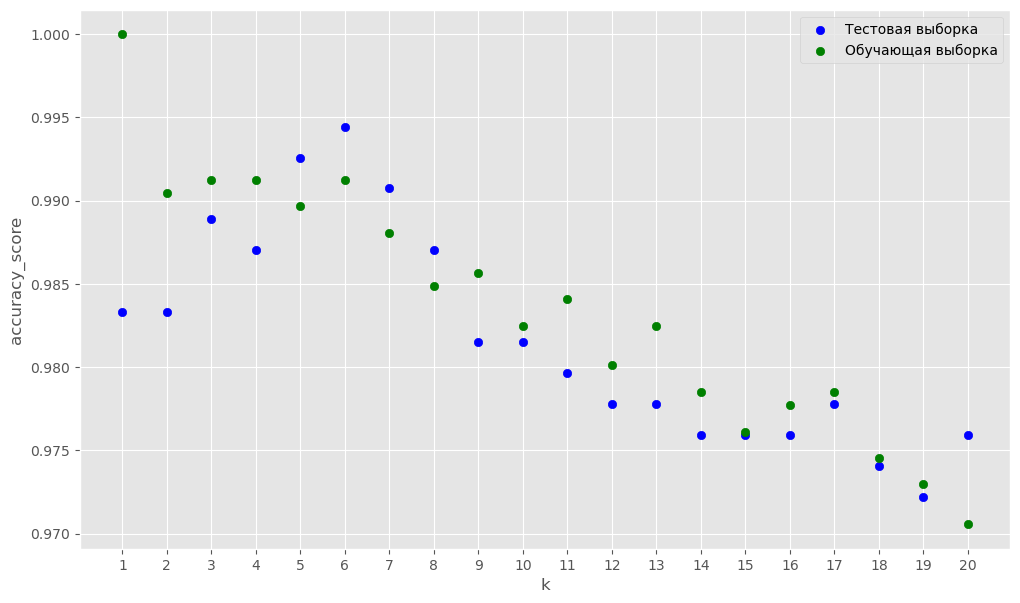

In [124]:
def test(k: int) -> int:
  model = KNeighborsClassifier(n_neighbors = k, algorithm="brute")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def train(k: int) -> int:
  model = KNeighborsClassifier(n_neighbors = k, algorithm="brute")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  return accuracy

k = list(range(1, 21))
test_accuracy = list(map(test, k))
train_accuracy = list(map(train, k))


plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

plt.scatter(k, test_accuracy, color='blue', label='Тестовая выборка')
plt.scatter(k, train_accuracy, color='green', label='Обучающая выборка')


plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.legend()
plt.grid(True)

plt.show()



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** Потому что ближайший сосед для элемента будет самим собой.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

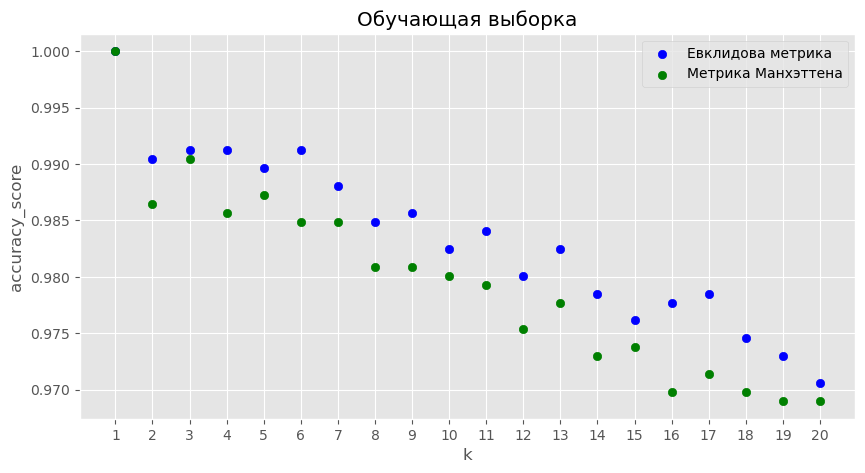

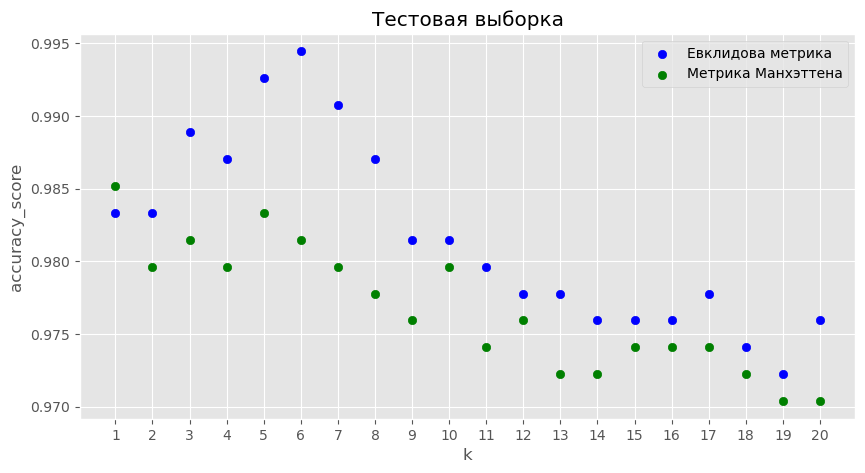

In [125]:
def foo(k, metric, data):
  model = KNeighborsClassifier(n_neighbors = k, algorithm="brute", p = metric)
  model.fit(X_train, y_train)
  if (data == "test"):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
  else:
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
  return accuracy

def make_list(metric, data):
  arr = []
  for k in range(1, 21):
    arr.append(foo(k, metric, data))
  return arr

k = list(range(1, 21))

test_accuracy_evc = make_list(2, "test")
test_accuracy_man = make_list(1, "test")

train_accuracy_evc = make_list(2, "train")
train_accuracy_man = make_list(1, "train")



plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.title("Обучающая выборка")
plt.scatter(k, train_accuracy_evc, color="blue", label="Евклидова метрика")
plt.scatter(k, train_accuracy_man, color="green", label="Метрика Манхэттена")
plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.title("Тестовая выборка")
plt.scatter(k, test_accuracy_evc, color="blue", label="Евклидова метрика")
plt.scatter(k, test_accuracy_man, color="green", label="Метрика Манхэттена")
plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.legend()
plt.grid(True)



plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Как было сказано метрика Манхэттена хороша на данных с сильным шумом, в нашем же случае элементы в одном классе не сильно отличаются друг от друга, поэтому Евклидова Метрика выдает лучшую точность чем Манхэттена.

**Выводы:** В работе мы выяснили, что лучшая точность предсказания на тестовой выборке получилась с Евклидовой метрикой и параметром k = 6. Аналогично на обучающей выборке лучшая точность предсказания получилась на Евклидовой метрике с k = 6. Также из графиков видно, что Евклидова метрика дает лучшую точность предсказания, чем метрика Манхэттена при тех же параметрах k.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [126]:
import pandas as pd

In [127]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [128]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [129]:
print(X.isna().any(axis=1).sum())
X = X.dropna()
y = y.loc[X.index]

177


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)
# print(X_test.dtypes)

# pd.concat([X_train, y_train], axis=1).to_json('data.json', orient='records')


# duplicates_all = X_train[X_train.duplicated()]
# print(duplicates_all)

# print(pd.concat([duplicates_all, y_train.loc[duplicates_all.index]], axis=1))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

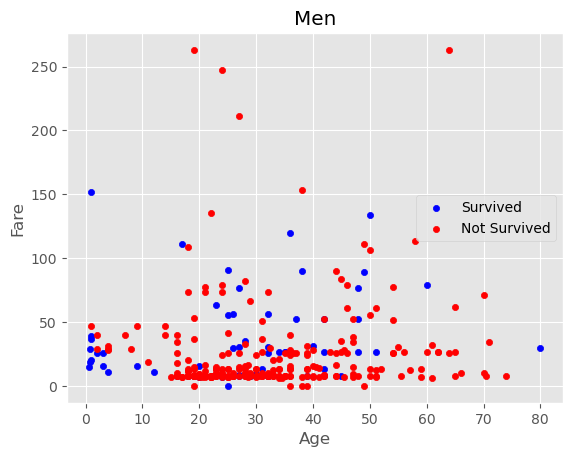

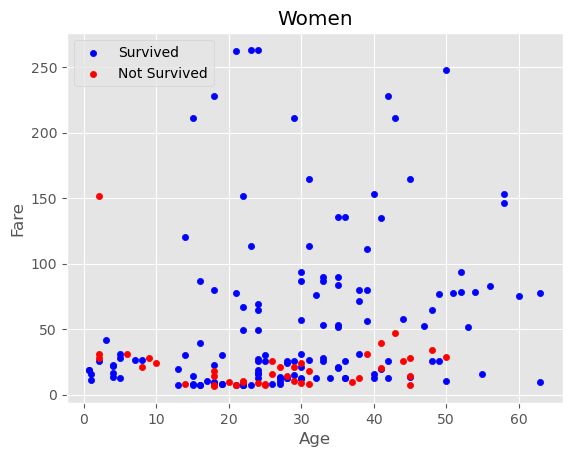

In [131]:
titanic_train = X_train.copy()
titanic_train["Survived"] = y_train

men = titanic_train[titanic_train['Sex'] == 'male']

women = titanic_train[titanic_train['Sex'] == 'female']


ax1 = men[men['Survived'] == 1].plot(x='Age', y='Fare', kind='scatter', color='blue', label='Survived')
men[men['Survived'] == 0].plot(x='Age', y='Fare', kind='scatter', color='red', label='Not Survived', ax=ax1)
ax1.set_title("Men")



ax2 = women[women['Survived'] == 1].plot(x='Age', y='Fare', kind='scatter', color='blue', label='Survived')
women[women['Survived'] == 0].plot(x='Age', y='Fare', kind='scatter', color='red', label='Not Survived', ax=ax2)
ax2.set_title("Women")
plt.show()



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

- **[Age <= 15]**
  - **[Fare <= 25]** ➔ **[Выжил]**
  - **[Fare > 25]** ➔ **[Не выжил]**
- **[Age > 15]**
  - **[Fare <= 50]** ➔ **[Не выжил]**
  - **[Fare > 50]** ➔ **[Выжил]**

 

**Дерево 2:**

- **[Женщина]** ➔ **[Выжил]**
- **[Мужчина]** ➔ **[Не выжил]**


Реализуйте полученные деревья по шаблону

In [132]:
def tree(features: pd.DataFrame) -> pd.Series:
    features["Survived"] = 0
    features.loc[((features["Age"] <= 15) & (features["Fare"] <= 25)), "Survived"] = 1
    features.loc[((features["Age"] > 15) & (features["Fare"] > 50)), "Survived"] = 1
    predicted = features["Survived"]
    return predicted

In [133]:
def tree1(features: pd.DataFrame) -> pd.Series:
    features["Survived"] = 0
    features.loc[(features["Sex"] == "female"), "Survived"] = 1
    predicted = features["Survived"]
    return predicted


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [134]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:

    score = accuracy_score(target, predicted)
    return score

In [135]:
predicted1 = tree(X_test.copy())
print(f"Первое дерево - {accuracy(y_test, predicted1)}")
predicted2 = tree1(X_test.copy())
print(f"Второе дерево - {accuracy(y_test, predicted2)}")

Первое дерево - 0.6744186046511628
Второе дерево - 0.7534883720930232


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Проблема заключатеся в том, что эти признаки связаны с друг другом, так как например если у человека есть родитель, то скорее всего поехал с семьей, значит у него могут быть братья или сестры. Также, для каждого человека у которого есть родитель, найдется его же родитель у которого будет как минимум один ребенок. Для признака "Pclass" также есть эта проблема, так как если человек поехал с семьей, то они будут в одном классе.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




Заменим значения в стоблце "Sex": "male" = 0, "female" = 1

In [136]:
x_train, x_test = X_train.copy(), X_test.copy()
x_train = x_train[["Pclass", "Age", "Sex", "Fare"]]
x_test = x_test[["Pclass", "Age", "Sex", "Fare"]]
x_train["Sex"] = x_train["Sex"].map(lambda x : 0 if x == "male" else 1)
x_test["Sex"] = x_test["Sex"].map(lambda x : 0 if x == "male" else 1)

0.7116279069767442


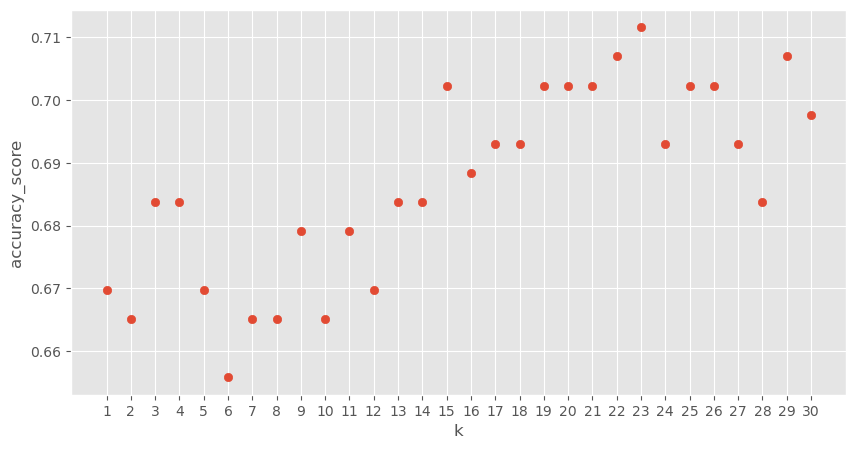

In [137]:
def training(k):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(x_train.to_numpy(), y_train)
  y_pred = model.predict(x_test.to_numpy())
  return accuracy_score(y_test, y_pred)

k = list(range(1, 31))
accuracy = list(map(training, k))

plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.scatter(k, accuracy)
plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.grid(True)
print(max(accuracy))

Наибольшая точность предсказания получилась 0.71 при k=23, с помощью этого метода получилось точнее предсказать, чем с помощью первого решающего дерева

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [138]:
for i in x_train:
  print(f"В столбце {i} максимум - {x_train[i].max()}, минимум - {x_train[i].min()}")

В столбце Pclass максимум - 3, минимум - 1
В столбце Age максимум - 80.0, минимум - 0.67
В столбце Sex максимум - 1, минимум - 0
В столбце Fare максимум - 263.0, минимум - 0.0


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:** Данные имеют разную размерность, то есть если человек является мужчиной или женщиной может довольно сильно повлиять на результат, но так как разность между значениями всего один это мало повлияет на метрику, в то время как разница например в 10 единиц в цене довольно мало может повлиять на результат, но на метрику эта разница повлияет больше, чем разница между мужчиной и женщиной.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Если в данных есть выбросы то это сильно такой метод масшабирования может плохо работать. Например, если есть множество точек и для них один показатель изменяется не сильно для этих точек, но есть одна точка которая довольно сильно выбивается из их множества, тогда она может сильно исказить масштабирование.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [139]:
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(x_train)
X_scaled_test = scaler.transform(x_test)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [140]:
print(f'максимумы - {np.max(X_scaled_test, axis = 0)}')
print(f'минимумы - {np.min(X_scaled_test, axis = 0)}')

максимумы - [1.         0.88654986 1.         1.94801977]
минимумы - [ 0.         -0.00315139  0.          0.        ]


Обучите модель и сравните результат предсказаний со стандартизацией и без.

0.7906976744186046


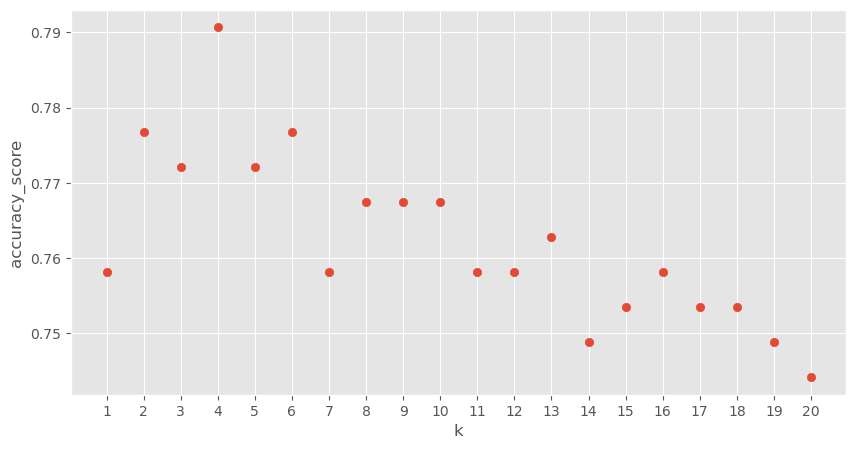

In [141]:
def training1(k):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(X_scaled_train, y_train)
  y_pred = model.predict(X_scaled_test)
  return accuracy_score(y_test, y_pred)

k = list(range(1, 21))
accuracy = list(map(training1, k))

plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.scatter(k, accuracy)
plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.grid(True)
print(max(accuracy))

**Вывод:** Максимальная точность предсказания получиалась при k = 4 - 0.79, то есть мы смогли повысить точность на 8% по сравнению с предыдущим пунктом.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

[0.9919839679358717, 0.905811623246493, 0.8977955911823647, 0.8677354709418837, 0.8557114228456913, 0.8476953907815631, 0.8476953907815631, 0.8336673346693386, 0.8336673346693386, 0.8376753507014028, 0.8276553106212425, 0.8296593186372746, 0.843687374749499, 0.8256513026052105, 0.8236472945891784, 0.8216432865731463, 0.8216432865731463, 0.8256513026052105, 0.8256513026052105, 0.8196392785571143]


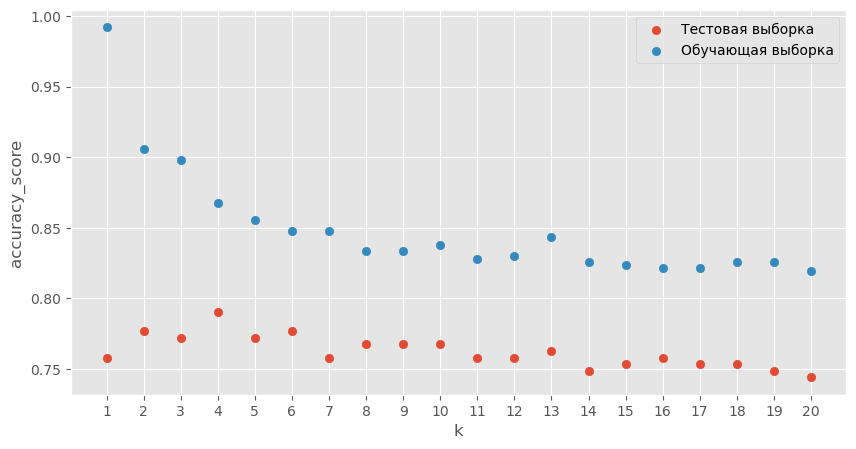

In [142]:
def training2(k):
  model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
  model.fit(X_scaled_train, y_train)
  y_pred = model.predict(X_scaled_train)
  return accuracy_score(y_train, y_pred)

k = list(range(1, 21))
accuracy1 = list(map(training1, k))
accuracy2 = list(map(training2, k))
print(accuracy2)

plt.figure(figsize=(10, 5))
plt.style.use('ggplot')
plt.scatter(k, accuracy1, label="Тестовая выборка")
plt.scatter(k, accuracy2, label="Обучающая выборка")
plt.xticks(range(min(k), max(k) + 1, 1))
plt.xlabel("k")
plt.ylabel("accuracy_score")
plt.grid(True)
plt.legend()

**Вывод:** Сначала мы обучили модель с помощью решающих деревьев и получили точность предсказания 0.67 - для первого дерева и 0.75 - для второго.
Далее мы воспользовались методом knn сначала без масштабирования а потом с ним, и получили точность предсказания 0.71(k=23) в первом случае и 0.79(k=4) в втором случае. Таким образом, большей точности мы добились при использовании knn с масштабированием минимакс. 0.79 не очень хороший показатель так как с помощью второго решающего дерева, которое основывалось на том, является ли человек мужчиной или женщиной, мы получили точность 0.75, примерно на 4% меньше. Также при предсказывании на обучающей выборке при k=1 я не получили точность 1, возможно это связано с тем, что мы использовали масштабирование.
